In [32]:
import glob
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pprint
import warnings
from matplotlib.patches import Rectangle

In [33]:
matplotlib.style.use('ggplot')
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['mathtext.default'] = 'regular'

# Simulated Data

### Collect, filter and sort performance and runtime for all simulated scenarios

In [34]:
perf_overview = {}
runtime_overview = {}
for sim_folder in glob.glob('sim*'):
    delta = float(sim_folder.split('_')[1][1])/10
    epsilon = int(sim_folder.split('_')[2])
    print('Delta = ' + str(delta) + ', epsilon = ' + str(epsilon))
    performance = pd.read_csv(os.path.join(sim_folder, 'performance.csv')).dropna(axis=1)
    runtime = pd.read_csv(os.path.join(sim_folder, 'runtime.csv')).dropna(axis=1)
    performance.rename(columns={'CPD AKS': 'ETKA'}, inplace=True)
    runtime.rename(columns={'CPD AKS': 'ETKA'}, inplace=True)
    # print(performance.describe())
    # print(runtime.describe())
    performance = performance.reindex([16,17,18,19,23,21,22,20, 0, 1, 2, 3, 7, 5, 6, 4, 8, 9, 10, 11, 15,13,14,12])
    runtime = runtime.reindex([16,17,18,19,23,21,22,20, 0, 1, 2, 3, 7, 5, 6, 4, 8, 9, 10, 11, 15,13,14,12])
    perf_overview[str(delta) + '_' + str(epsilon)] = performance
    runtime_overview[str(delta) + '_' + str(epsilon)] = runtime

Delta = 0.5, epsilon = 5
Delta = 0.5, epsilon = 7
Delta = 0.7, epsilon = 5
Delta = 0.7, epsilon = 7


## Plot performance
Creation of a plot with 4 heatmaps as subplots for each of the 4 CPD configurations

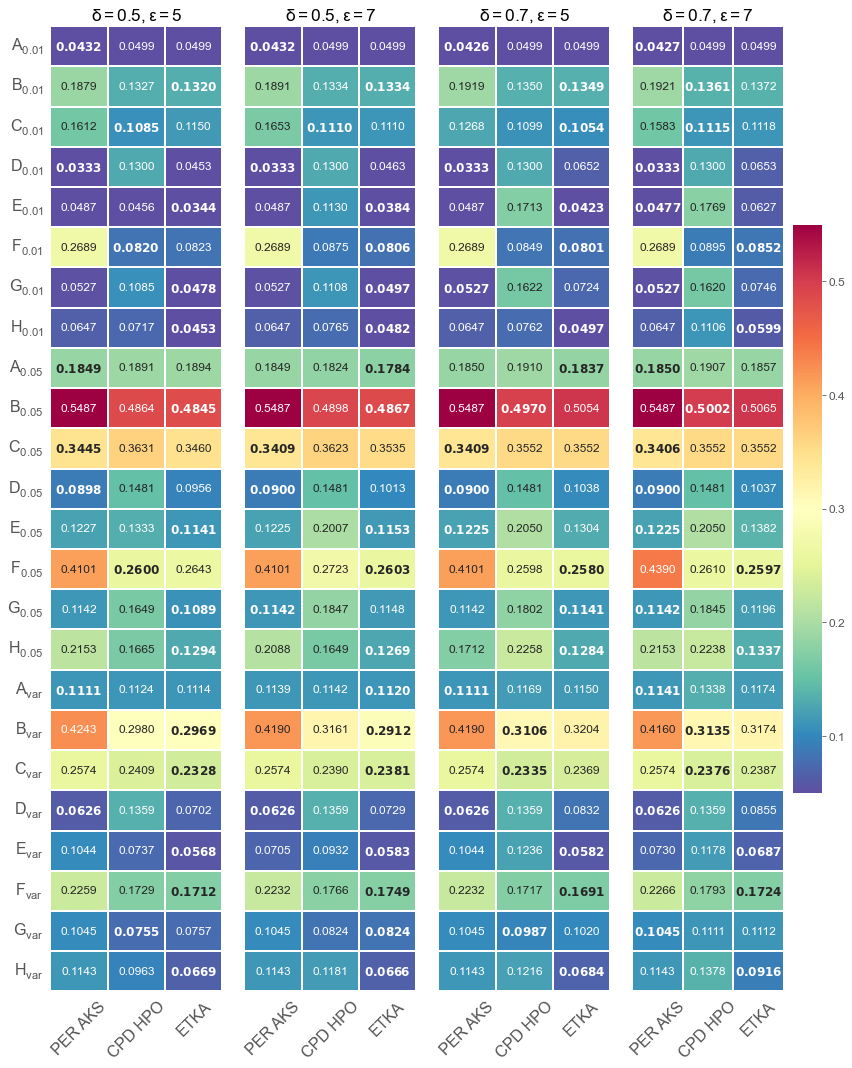

In [35]:
fig, axs = plt.subplots(figsize=(12,15), nrows=1, ncols=4, sharey=True,gridspec_kw={'width_ratios': [1, 1, 1, 1.1]})

for count, identifier in enumerate(['0.5_5', '0.5_7', '0.7_5', '0.7_7']):
    ax = axs[count]
    performance = perf_overview[identifier]
    plot_data = performance[['PER AKS', 'CPD HPO', 'ETKA']].astype(float)

    label_df = pd.DataFrame(columns=['PER AKS', 'CPD HPO', 'ETKA'])
    row_min = plot_data.idxmin(axis=1)
    for index, row in plot_data.iterrows():
        for model in label_df.columns:
            number = "{:.4f}".format(row[model])
            if row_min.at[index] == model:
                label_df.at[index, model] = r"$\bf{" + number + "}$"
            else:
                label_df.at[index, model] = number

    sns.heatmap(data=plot_data, cmap="Spectral_r", cbar_kws={"shrink": .75}, vmin=0.05, vmax=0.55,
                annot=label_df, fmt='', linewidths=1.5, linecolor='white', cbar=3==count, annot_kws={"size": 12}, ax=ax)    
    ax.set_xticklabels(plot_data.columns, rotation=45, ha='center', fontsize=16)
    ax.tick_params(top=False, bottom=False, left=False, right=False)
    #for row, index in enumerate(plot_data.index):
    #    position = plot_data.columns.get_loc(row_min[index])
    #    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='0.2', lw=1.5))
    ax.title.set_text('$\delta = ' + identifier.split('_')[0] + ', \epsilon = ' + identifier.split('_')[1] + '$')
#y_labels = list(performance['dataset'])
y_labels = ['$' + letter + '_{' + noise + '}$' for noise in ['0.01', '0.05', 'var'] for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
axs[0].set_yticklabels(y_labels, rotation=0, fontsize=16)
axs[0].tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
fig.tight_layout()
# fig.suptitle('Results Overview Simulated Data for different CPD Parameters')
plt.savefig('heatmap_simuldata.pdf', bbox_inches='tight', dpi=600)
plt.show()

## runtime
Creation of a plot with 4 heatmaps as subplots for each of the 4 CPD configurations for the runtime information

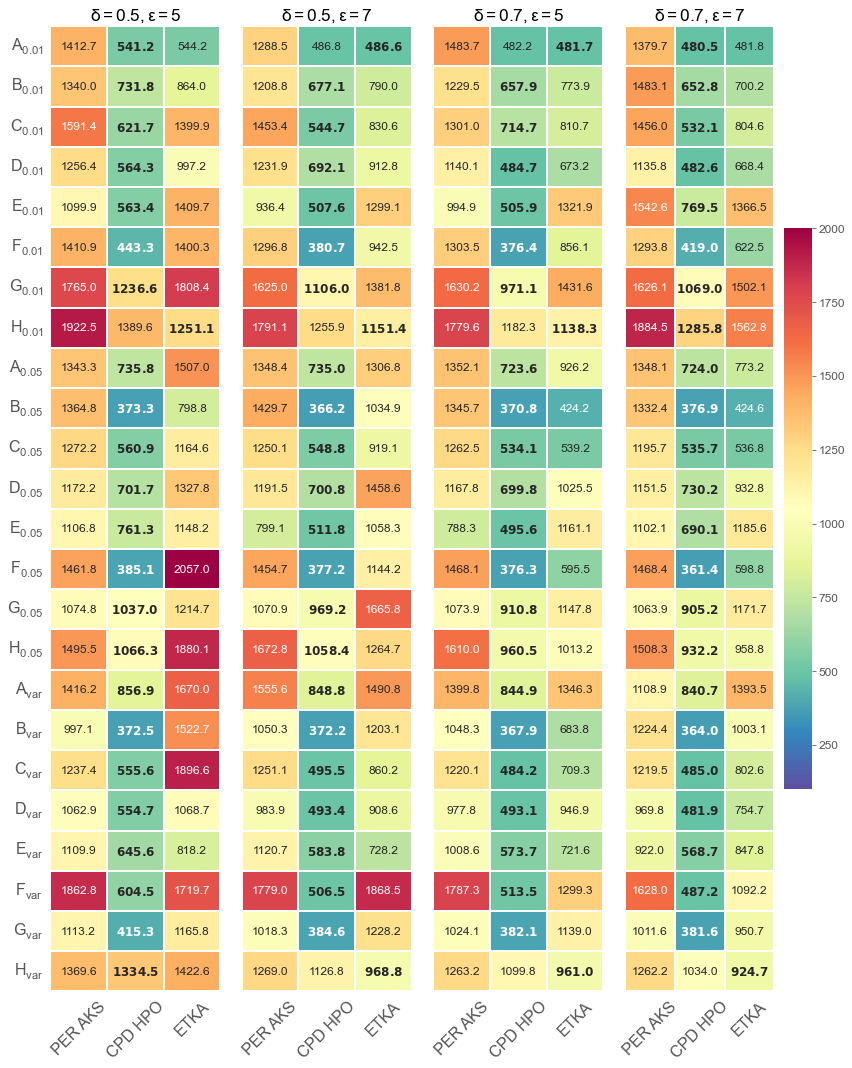

In [36]:
fig, axs = plt.subplots(figsize=(12,15), nrows=1, ncols=4, sharey=True,gridspec_kw={'width_ratios': [1, 1, 1, 1.1]})

for count, identifier in enumerate(['0.5_5', '0.5_7', '0.7_5', '0.7_7']):
    ax = axs[count]
    performance = runtime_overview[identifier]
    plot_data = performance[['PER AKS', 'CPD HPO', 'ETKA']].astype(float)

    label_df = pd.DataFrame(columns=['PER AKS', 'CPD HPO', 'ETKA'])
    row_min = plot_data.idxmin(axis=1)
    for index, row in plot_data.iterrows():
        for model in label_df.columns:
            number =  "{:.1f}".format(row[model])
            if row_min.at[index] == model:
                label_df.at[index, model] = r"$\bf{" + number + "}$"
            else:
                label_df.at[index, model] = number

    sns.heatmap(data=plot_data, cmap="Spectral_r", cbar_kws={"shrink": .75}, vmin=100, vmax=2000,
                annot=label_df, fmt='', linewidths=1.5, linecolor='white', cbar=3==count, annot_kws={"size": 12}, ax=ax)    
    ax.set_xticklabels(plot_data.columns, rotation=45, ha='center', fontsize=16)
    ax.tick_params(top=False, bottom=False, left=False, right=False)
    #for row, index in enumerate(plot_data.index):
    #    position = plot_data.columns.get_loc(row_min[index])
    #    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='0.2', lw=1.5))
    ax.title.set_text('$\delta = ' + identifier.split('_')[0] + ', \epsilon = ' + identifier.split('_')[1] + '$')
#y_labels = list(performance['dataset'])
y_labels = ['$' + letter + '_{' + noise + '}$' for noise in ['0.01', '0.05', 'var'] for letter in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']]
axs[0].set_yticklabels(y_labels, rotation=0, fontsize=16)
axs[0].tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
fig.tight_layout()
# fig.suptitle('Results Overview Simulated Data for different CPD Parameters')
plt.savefig('heatmap_simuldata_runtime.pdf', bbox_inches='tight', dpi=600)
plt.show()

# Real World Data

### Collect real-world data results on model accuracy and runtime

In [37]:
realworld_overview = {}
for sim_folder in glob.glob('realworld*'):
    performance = pd.read_csv(os.path.join(sim_folder, 'performance.csv')).dropna(axis=1)
    runtime = pd.read_csv(os.path.join(sim_folder, 'runtime.csv')).dropna(axis=1)
    performance.rename(columns={'CPD AKS': 'ETKA'}, inplace=True)
    runtime.rename(columns={'CPD AKS': 'ETKA'}, inplace=True)
    realworld_overview['Prediction error'] = performance
    realworld_overview['Runtime'] = runtime

## Plot real-world results
Plot real-world results for model accuracy and runtime as subplots in a joint figure

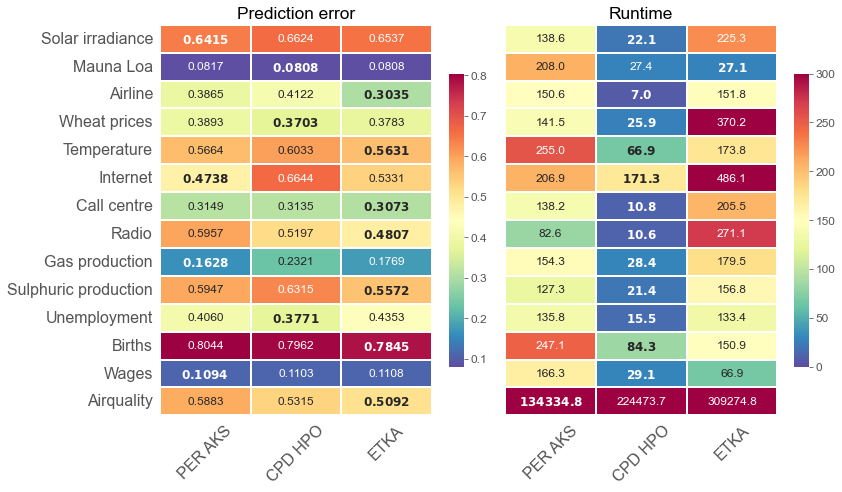

In [38]:
fig, axs = plt.subplots(figsize=(12,7), nrows=1, ncols=2, sharey=True)

for count, identifier in enumerate(['Prediction error', 'Runtime']):
    ax = axs[count]
    performance = realworld_overview[identifier]
    plot_data = performance[['PER AKS', 'CPD HPO', 'ETKA']].astype(float)

    label_df = pd.DataFrame(columns=['PER AKS', 'CPD HPO', 'ETKA'])
    row_min = plot_data.idxmin(axis=1)
    for index, row in plot_data.iterrows():
        for model in label_df.columns:
            form = "{:.4f}" if identifier == 'Prediction error' else "{:.1f}"
            number = form.format(row[model])
            if row_min.at[index] == model:
                label_df.at[index, model] = r"$\bf{" + number + "}$"
            else:
                label_df.at[index, model] = number
    

    sns.heatmap(data=plot_data, cmap="Spectral_r", cbar_kws={"shrink": .75}, vmin=0 if identifier=='Runtime' else None, vmax=300 if identifier=='Runtime' else None,
                annot=label_df, fmt='', linewidths=1.5, linecolor='white', cbar=True, annot_kws={"size": 12}, ax=ax)    
    ax.set_xticklabels(plot_data.columns, rotation=45, ha='center', fontsize=16)
    ax.tick_params(top=False, bottom=False, left=False, right=False)
    #for row, index in enumerate(plot_data.index):
    #    position = plot_data.columns.get_loc(row_min[index])
    #    ax.add_patch(Rectangle((position, row),1,1, fill=False, edgecolor='0.2', lw=1.5))
    ax.title.set_text(identifier)
#y_labels = list(performance['dataset'])
y_labels = ["Solar irradiance", "Mauna Loa", 'Airline', 'Wheat prices', 'Temperature', 'Internet',
            "Call centre", 'Radio', 'Gas production', 'Sulphuric production', 'Unemployment', 'Births', 'Wages', 'Airquality']
axs[0].set_yticklabels(y_labels, rotation=0, fontsize=16)
axs[0].tick_params(top=False,
               bottom=False,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)
fig.tight_layout()
# fig.suptitle('Results Overview Simulated Data for different CPD Parameters')
plt.savefig('heatmap_realworld.pdf', bbox_inches='tight', dpi=600)
plt.show()